In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_10_9_universal2.whl size=438020 sha256=e2b6943ab5be4fa5661150d2ea53dec724b307b3e5d75bbd10ab3a393be33d86
  Stored in directory: /Users/lakshmanrajlokesh/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ticker = 'RELIANCE.NS'
data = yf.download(ticker, start='2020-01-01', end='2025-04-06')
data = data[['Close']].dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close
Ticker,RELIANCE.NS
Date,
2020-01-01,682.725769
2020-01-02,694.348816
2020-01-03,695.185425
2020-01-06,679.062561
2020-01-07,689.509705
...,...
2025-03-28,1275.099976
2025-04-01,1252.599976


In [6]:
# Resample to monthly closing prices (end of each month)
monthly_data = data.resample('M').last()
monthly_data

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_3991/355654728.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()


Price,Close
Ticker,RELIANCE.NS
Date,
2020-01-31,638.427307
2020-02-29,600.890015
2020-03-31,503.700226
2020-04-30,663.007446
2020-05-31,668.561584
...,...
2024-12-31,1215.449951
2025-01-31,1265.099976


In [7]:
# Step 2A: Simple Moving Averages (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

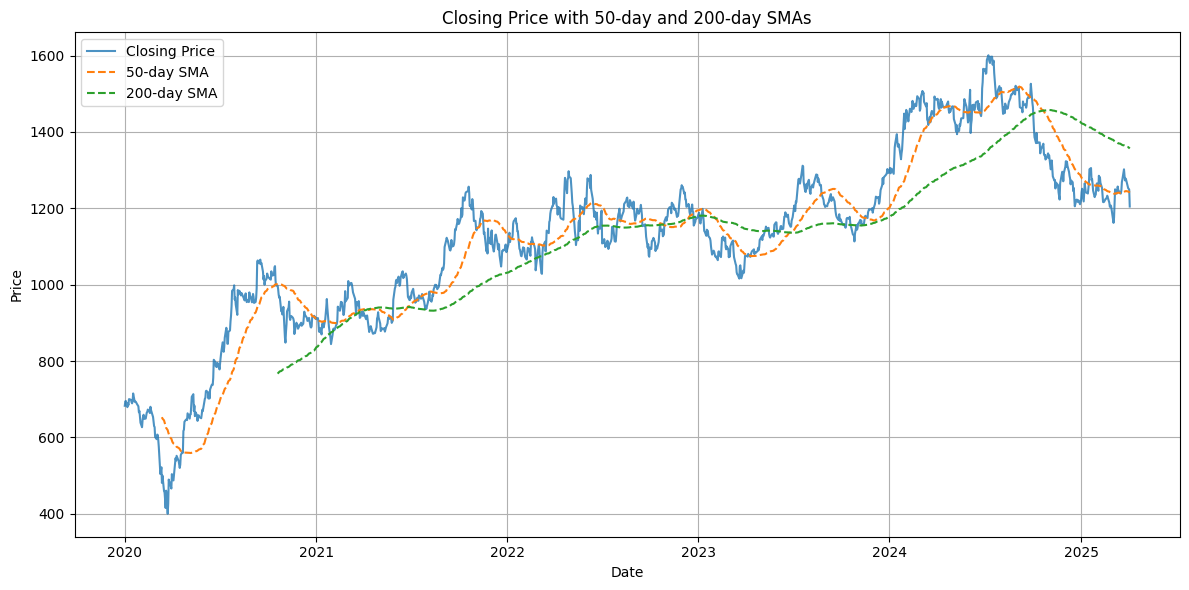

In [8]:
# Plot 1: Closing Price with SMAs
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', alpha=0.8)
plt.plot(data['SMA_50'], label='50-day SMA', linestyle='--')
plt.plot(data['SMA_200'], label='200-day SMA', linestyle='--')
plt.title('Closing Price with 50-day and 200-day SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
# Step 2B: Volatility (30-day rolling standard deviation of returns)
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility_30d'] = data['Daily_Return'].rolling(window=30).std()

In [10]:
# Step 2C: Daily & Cumulative Returns
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

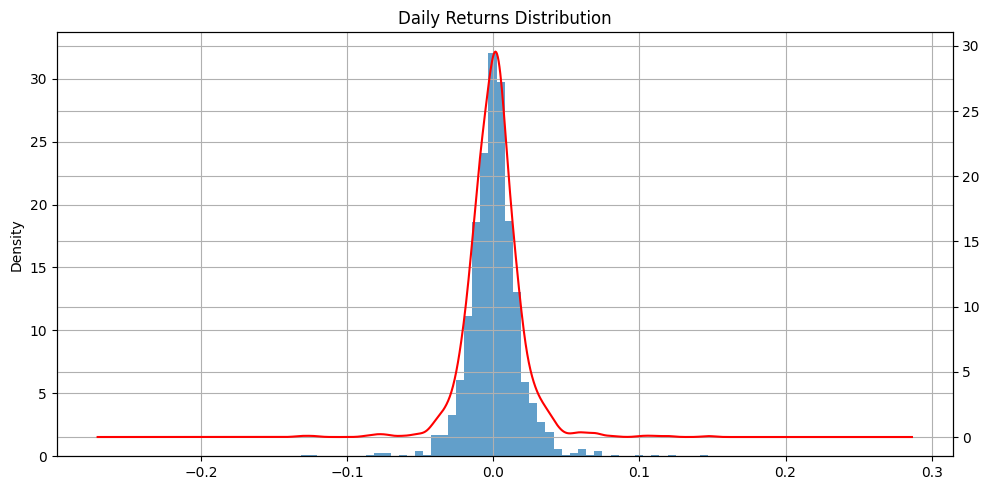

In [11]:
# Plot 2: Daily Returns Distribution
plt.figure(figsize=(10, 5))
data['Daily_Return'].hist(bins=50, alpha=0.7, density=True)
data['Daily_Return'].plot(kind='kde', secondary_y=True, color='red')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.grid()
plt.tight_layout()
plt.show()

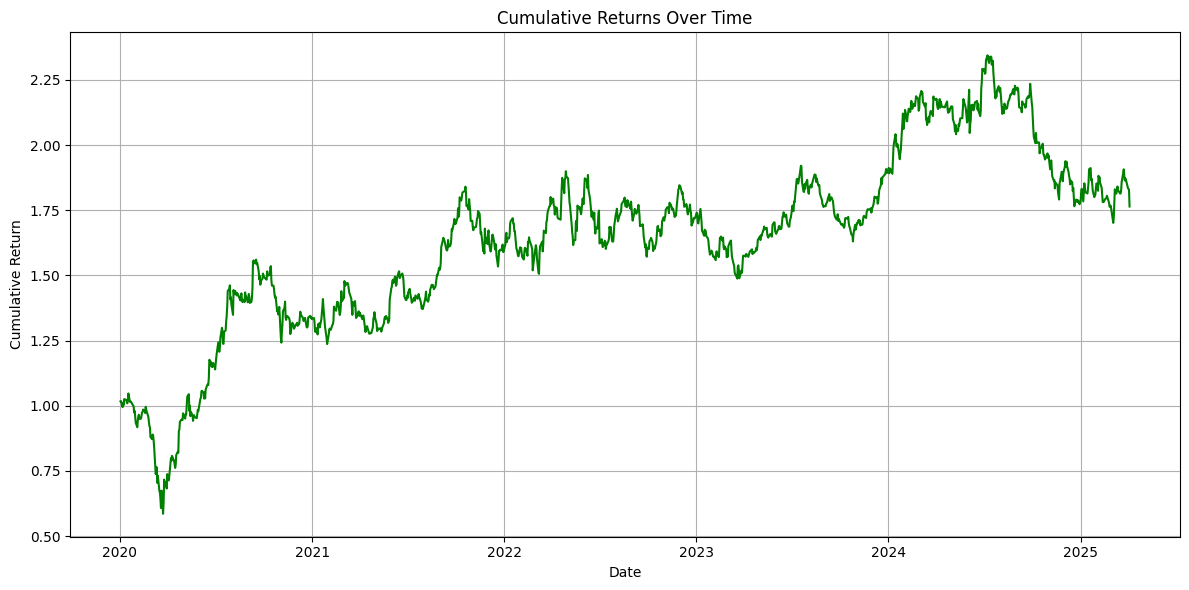

In [12]:
# Plot 3: Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return'], label='Cumulative Return', color='green')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
# Step 2D: RSI (14-day)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

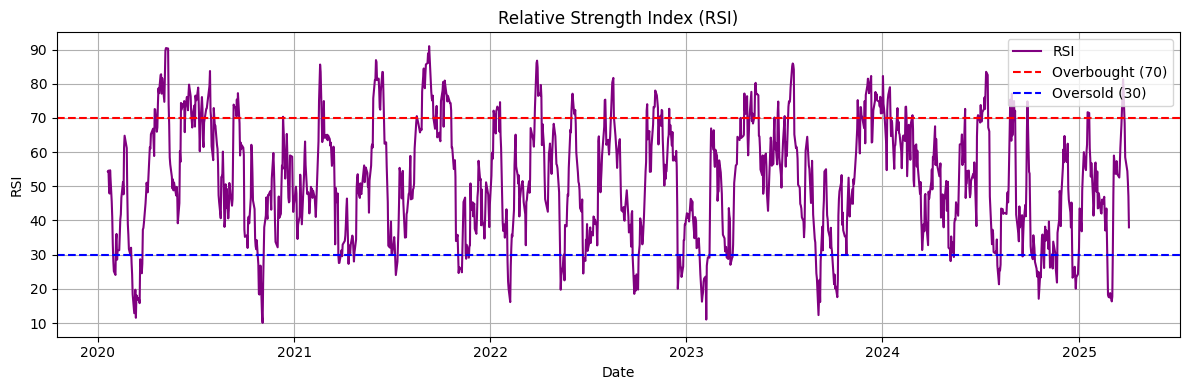

In [14]:
# Plot 4: RSI Trend
plt.figure(figsize=(12, 4))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
# Step 2E: Bollinger Bands
data['Rolling_Mean_20'] = data['Close'].rolling(window=20).mean()
data['Rolling_STD_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['Rolling_Mean_20'] + (2 * data['Rolling_STD_20'])
data['Lower_Band'] = data['Rolling_Mean_20'] - (2 * data['Rolling_STD_20'])

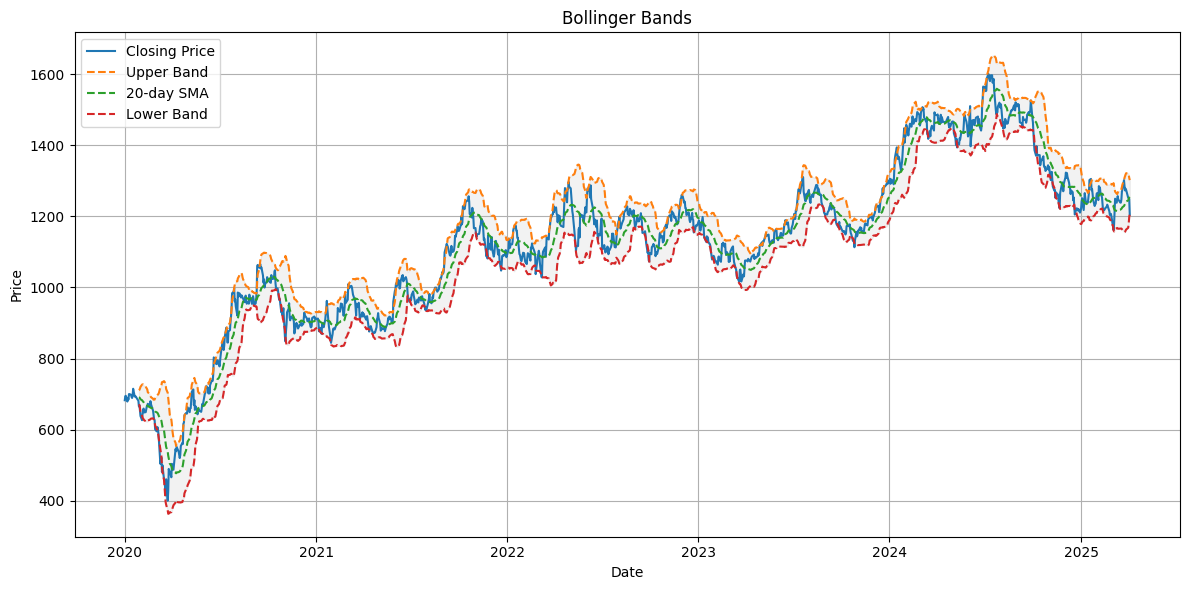

In [16]:
# Plot 5: Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['Upper_Band'], label='Upper Band', linestyle='--')
plt.plot(data['Rolling_Mean_20'], label='20-day SMA', linestyle='--')
plt.plot(data['Lower_Band'], label='Lower Band', linestyle='--')
plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()